# Exploratory Factor Analysis Protocol

In [18]:
# suppress warnings for tutorial
options(warn=-1)

## Load custom function libraries

    1. FA_utils.R - miscellaneous functions that are used throughout the factor analysis model
    (loadPacks, multivariate_normality, impute_data, choose_rotation, visualize_solution, factor_corrplot)
    
    2. sysCriterion_utils.R - functions that quantify the systematic tuning criterion and the probability a
    given solution could have emerged by chance
    (sysFactors, sysSolution)
    
    3. Fa_model.R - a function that pulls together all previously mentioned functions to implement the full 
    factor analysis protocol in one line of code
    (factor_analysis)

In [51]:
source('sysCriterion_utils.R')
source('FA_utils.R')
source('FA_model.R')

## Install and load all R packages and dependicies necessary to run analysis

In [20]:
loadPacks()

All packages loaded successfully



NULL

## Load and format data (X)

In [21]:
filename <- 'finalData_color.xlsx'
scalingData <- read_excel(filename,col_names = TRUE)
X <- matrix(as.numeric(unlist(scalingData)),nrow=dim(scalingData)[1])

## Step 1. Validate individual differences!

1. Between/within observer variability > 1
2. Test-restest reliability
3. Split-half reliability

## Step 2. Confirm FA is appropriate

1. Check for indication of underlying covariance/correlation structure

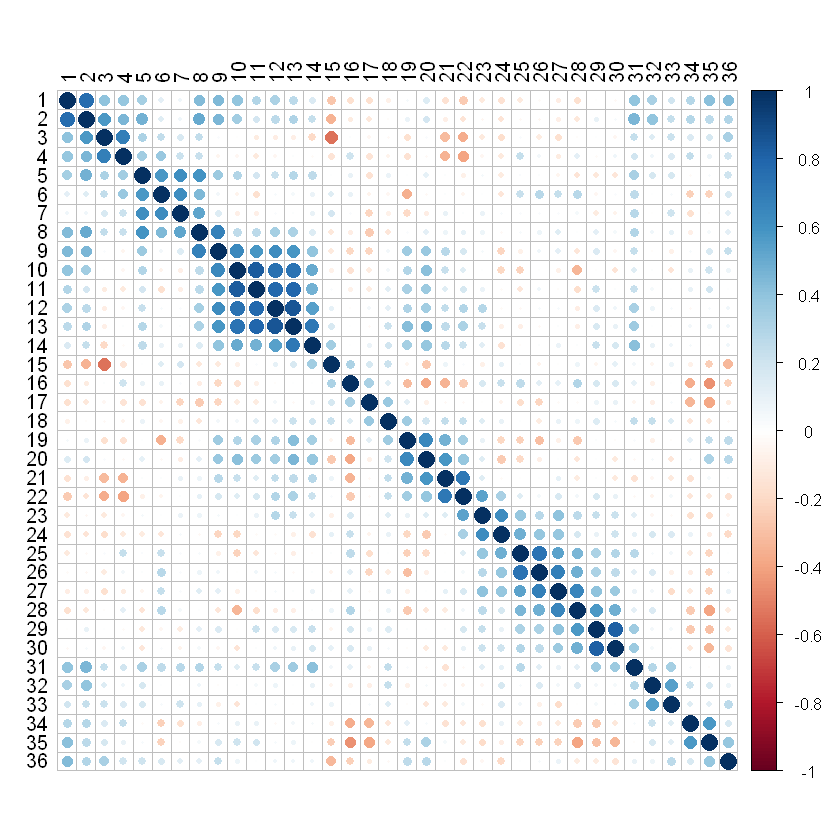

In [25]:
faMat <- cor(X, use = "pairwise.complete.obs")
corrplot(faMat,tl.col = 'black')

If your data matrix looks like this, you might want to rethink doing an EFA:

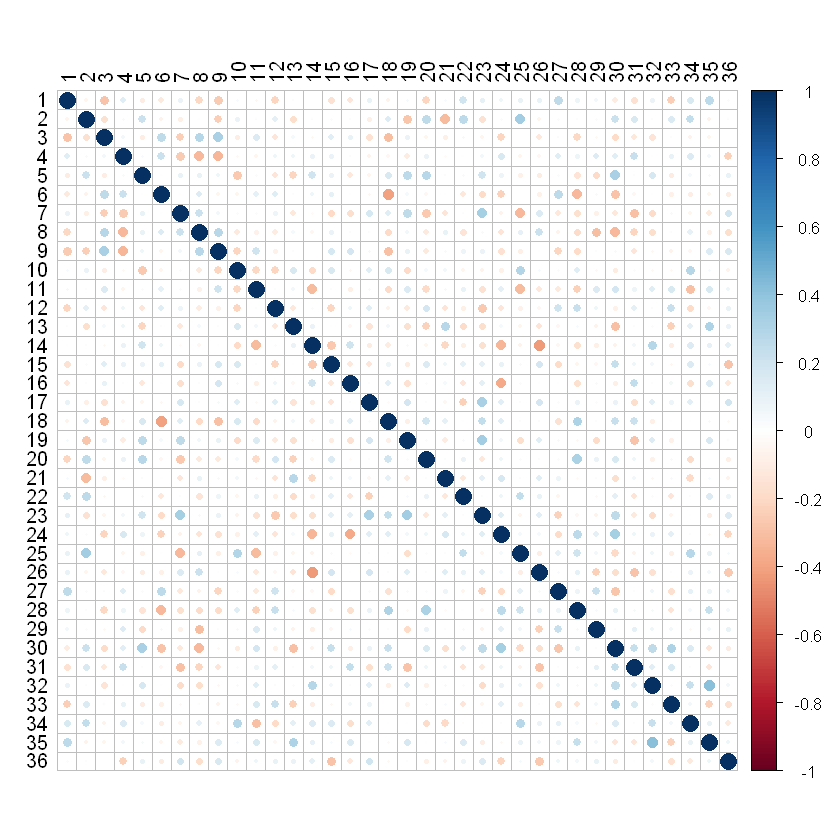

In [26]:
corMat <- cor(matrix(rnorm(50*36),50),use = "pairwise.complete.obs")
corrplot(corMat,tl.col = 'black')

2. Confirm that the cov/cor matrix does not resemble an identity matrix (Bartlett's test of sphericity p-value < 0.05)

In [31]:
# pvalue < 0.05 indicates correlation structure exists and that FA is appropriate)
sphericity <- cortest.bartlett(faMat,n=dim(X)[1])
sphericity$p.value

sphericity <- cortest.bartlett(corMat,n=dim(X)[1])
sphericity$p.value

[1] 7.732246e-39

[1] 0.7322341

3. Check whether cov/cor matrix is unifactorial (Kaiser-Meyer-Olkin Test, rule of thumb, overall MSA > 0.5)

In [33]:
kmo_test <- KMO(faMat)
kmo_test$MSA

kmo_test <- KMO(corMat)
kmo_test$MSA

[1] 0.441559

[1] 0.245264

4. Calculate the determinant of the cov/cor matrix (if near 0, this confirms linearly dependent dimensions)

In [36]:
# if p.value is == NaN, check whether the det(R) is near 0. If so, the sphericity test can't be computed and the 
# determinant being near 0 suggests linearly dependent variables and thus supports the use of factor analysis.
det(faMat)

[1] 4.835914e-17

## Step 3. Choose solution

1. Covariance or Correlation
2. Method of estimation
3. Rotation
4. Number of factors

In [45]:
# CHECK for multivariate normality (pvalue > 0.05 to be indicative of normality)
multivariate_normality(X)


	One-sample Kolmogorov-Smirnov test

data:  d2
D = 0.20533, p-value = 0.03537
alternative hypothesis: two-sided


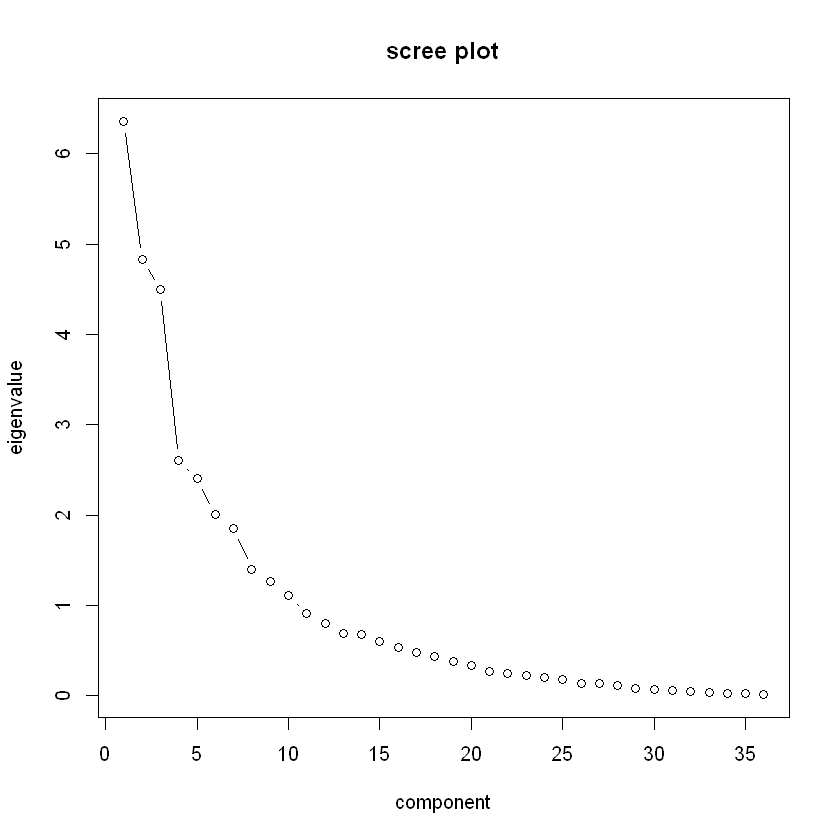

In [46]:
# CHECK scree plot
eig <- eigen(faMat)
plot(1:dim(faMat)[1],type='b',eig$values,main='scree plot',xlab='component',ylab='eigenvalue')

### Ultimately, the factor_analysis custom function will make the statistical decisions necessary to provide you with a final solution through the following steps:

1. Compute the correlation/covariance matrix
2. Determine method of estimation based on deviation from normality
3. Choose the number of factors to extract 
4. Choose rotation
5. Compute final model 
6. Compute factor scores
7. Save results and output loadings and scores to excel

factor_analysis(X, mat='cor', fm = 'pc', check_normality = TRUE, rotOrtho='varimax', rotOblique='promax',extractMethod = 'sys',
                iterations = 1000, scores_method='Thurstone')

In [52]:
# RUN factor analysis
solution = factor_analysis(X, iterations=100)

In [48]:
# INDEX solution structure
fm = solution[[1,1]]
rotation = solution[[2,1]]
faFinal = solution[[3,1]]
normality = solution[[4,1]]
rotateCorr = solution[[5,1]]
scores = solution[[6,1]]
extractMethod = solution[[7,1]]

In [49]:
# SOME fit stats
faStats = fa.stats(faMat,faFinal$loadings,n.obs=dim(X)[1]) # > 0.05
faStats

# root mean squared error of approximation
faStats$RMSEA # >= 0.05

# CHECK out your model
faFinal

Call: fa.stats(r = faMat, f = faFinal$loadings, n.obs = dim(X)[1])

Test of the hypothesis that 9 factors are sufficient.

The degrees of freedom for the model is 342  and the fit was  15.39 
The number of observations was  46  with Chi Square =  402.78  with prob <  0.013 

Measures of factor score adequacy             
 Correlation of scores with factors            1 1 1 1 1 1 1 1 1
Multiple R square of scores with factors       1 1 1 1 1 1 1 1 1
Minimum correlation of factor score estimates  1 1 1 1 1 1 1 1 1 

RMSEA      lower      upper confidence 
0.05813958 0.02075758 0.09048479 0.95000000

Principal Components Analysis
Call: principal(r = faMat, nfactors = nF, residuals = TRUE, rotate = rotate, 
    n.obs = n, scores = FALSE, eps = 1e-14)
Standardized loadings (pattern matrix) based upon correlation matrix
     RC1   RC3   RC2   RC7   RC5   RC9   RC6   RC4   RC8   h2   u2 com
1   0.39  0.60 -0.08 -0.07  0.10  0.00  0.31 -0.25 -0.15 0.71 0.29 3.1
2   0.35  0.68 -0.11 -0.01  0.18  0.11  0.34 -0.14 -0.04 0.78 0.22 2.5
3  -0.12  0.86 -0.09 -0.14  0.17 -0.01  0.10  0.05 -0.04 0.82 0.18 1.2
4  -0.02  0.63  0.18 -0.29  0.24 -0.13  0.14  0.12 -0.16 0.65 0.35 2.4
5   0.29  0.27 -0.03 -0.03  0.74 -0.18  0.15  0.06  0.00 0.77 0.23 1.9
6  -0.06  0.11  0.32 -0.05  0.81 -0.03 -0.04  0.10 -0.19 0.83 0.17 1.5
7  -0.06 -0.05  0.00 -0.02  0.88 -0.06  0.12 -0.09  0.05 0.80 0.20 1.1
8   0.34  0.28 -0.06  0.04  0.67  0.22 -0.01 -0.30  0.13 0.81 0.19 2.8
9   0.69  0.18 -0.04  0.27  0.26  0.14 -0.10 -0.26 -0.02 0.75 0.25 2.3
10  0.88  0.10 -0.10  0.11 -0.02 -0.13 -0.12 -0.10 -0.03 0.85 0.15 1.

## Step 4. Visualize solution!

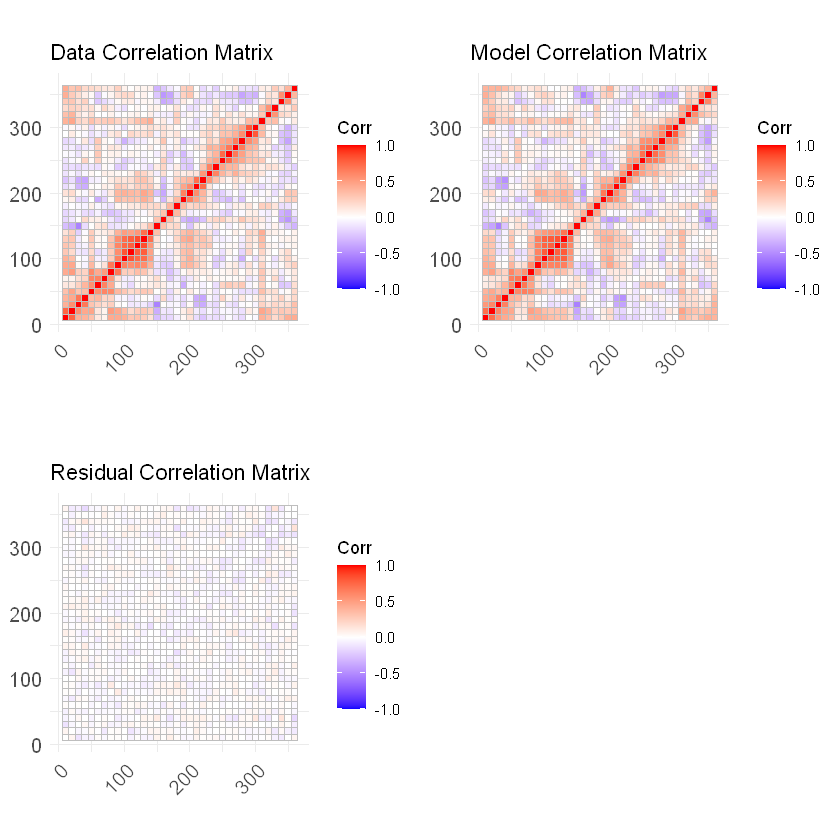

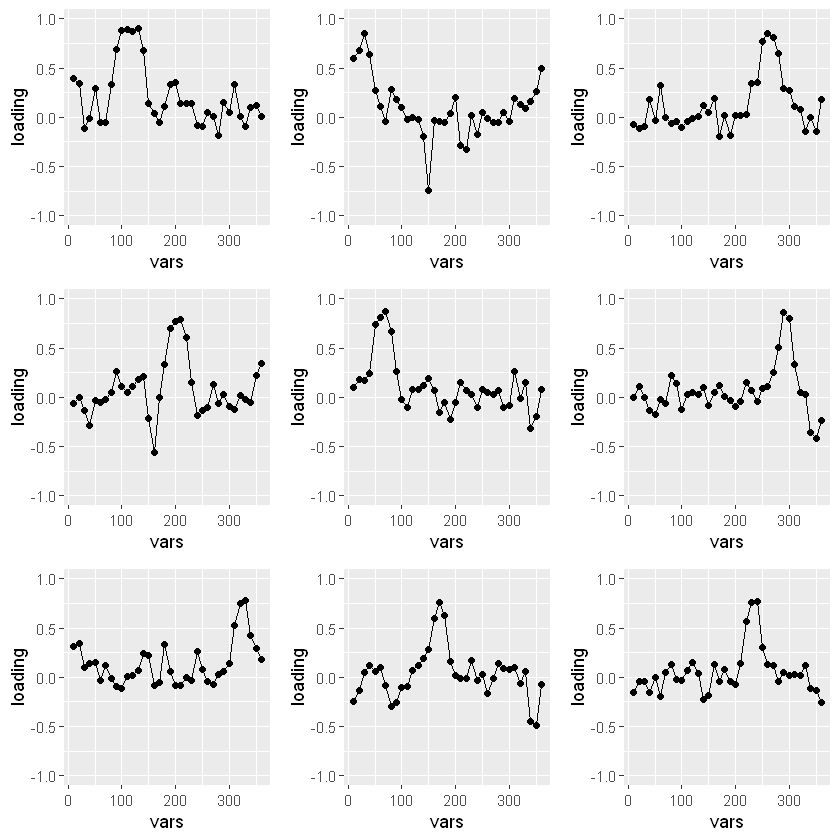

In [50]:
visualize_solution(scalingData,faFinal)

## Step 5. Define factors

1. Observe groupings
2. Analyze factor scores

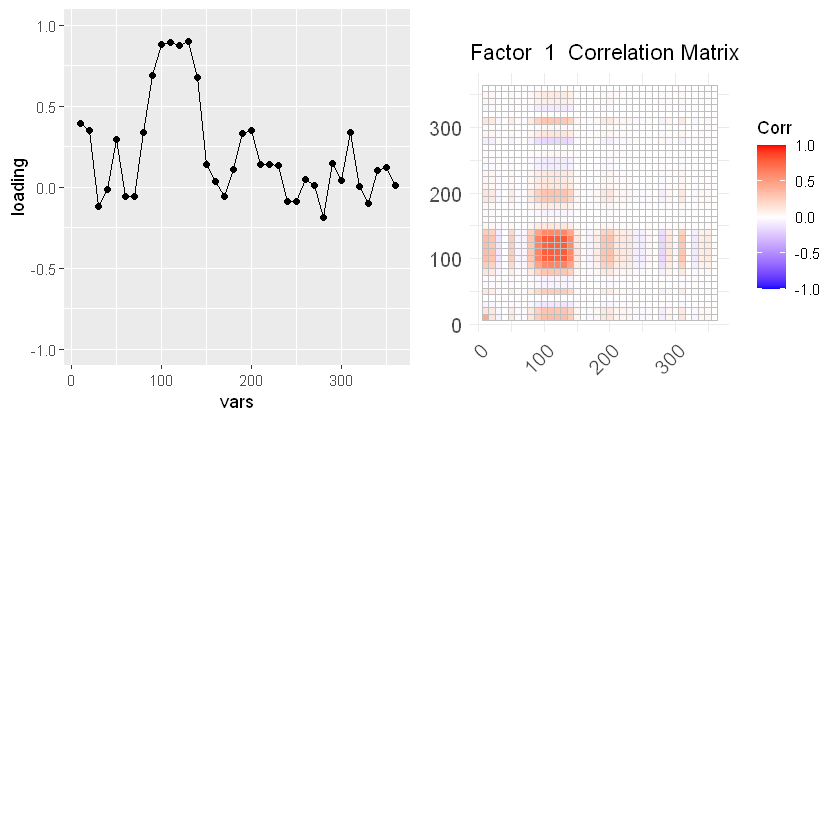

In [16]:
#VISUALIZE correlation plot for a single factor
factor_corrplot(scalingData,faFinal,1)

In [17]:
options(warn=0)